In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
classes = Base.classes.keys()
classes

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


In [10]:
# View Measurement Data
connect = engine.connect()
measurement_result = pd.read_sql("select * from measurement", connect)
measurement_result

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [11]:
measurement_result

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [12]:
# View Station Data
station_result = pd.read_sql("select * from station", connect)
station_result

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).first()
most_recent


('2017-08-23',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_data_df = pd.DataFrame(year_data, columns=["Date", "Precipitation"])


# Sort the dataframe by date
year_data_df = year_data_df.sort_values(by=['Date'],ascending=True)
# year_data_df = year_data_df.groupby("Date").sum()
year_data_df = year_data_df.dropna()
year_data_df



,Date,Precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


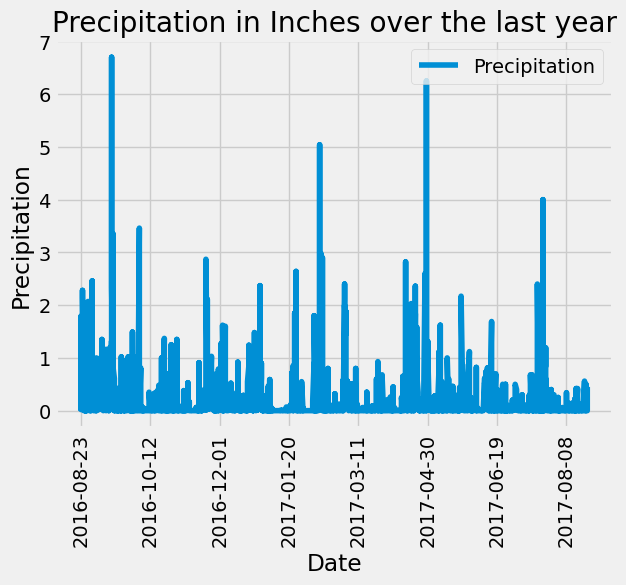

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(year_data_df["Date"], year_data_df["Precipitation"])
plt.xticks(ticks=np.arange(0, 365, 50), rotation=90)
plt.xlabel(year_data_df['Date'].name)
plt.ylabel(year_data_df['Precipitation'].name)
plt.title("Precipitation in Inches over the last year")
plt.legend(labels=['Precipitation'], loc='upper right')

plt.show()


In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Station data
station_result


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [26]:
measurement_result

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [30]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.id).count()
total_stations


9

In [68]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# station_active_status = session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).order_by(measurement.prcp.desc).all()
# station_active_status

station_active_status = session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).order_by(func.count(measurement.prcp).desc()).all()
station_active_status


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp_USC00519281 = session.query(measurement.station, func.min(measurement.prcp)).filter(measurement.station == "USC00519281").one()
print(f"The lowest temperature recorded for station number {lowest_temp_USC00519281[0]} is {lowest_temp_USC00519281[1]} degrees")

highest_temp_USC00519281 = session.query(measurement.station, func.max(measurement.prcp)).filter(measurement.station == "USC00519281").one()
print(f"The highest temperature recorded for station number {highest_temp_USC00519281[0]} is {highest_temp_USC00519281[1]} degrees")

average_temp_USC00519281 = session.query(measurement.station, func.avg(measurement.prcp)).filter(measurement.station == "USC00519281").one()
print(f"The average temperature recorded for station number {average_temp_USC00519281[0]} is {average_temp_USC00519281[1]} degrees")



The lowest temperature recorded for station number USC00519281 is 0.0 degrees
The highest temperature recorded for station number USC00519281 is 9.64 degrees
The average temperature recorded for station number USC00519281 is 0.2123520923520915 degrees


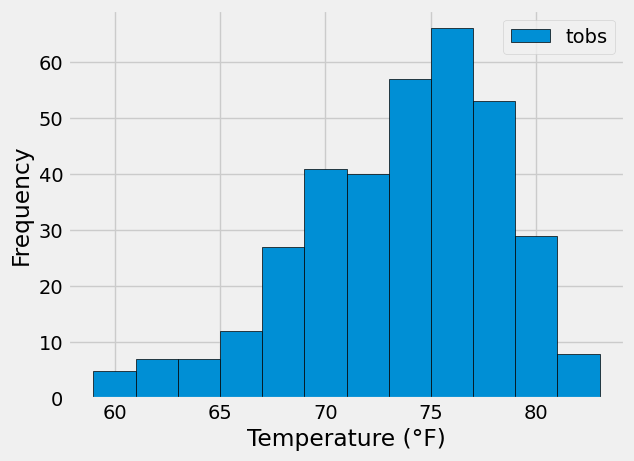

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_active_status = session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).order_by(func.count(measurement.prcp).desc()).first()
most_active_station = station_active_status[0]
most_active_station

# Data taken from one of the first steps above where I query the most recent date, which is stored in the variable most_recent
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data_USC00519281 = session.query(measurement.date, measurement.station, measurement.prcp, measurement.tobs).filter(measurement.station == "USC00519281").filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_data_USC00519281_df = pd.DataFrame(year_data_USC00519281, columns=["Date", "Station", "Precipitation", "Temperature"])


# Create the histogram
plt.hist(year_data_USC00519281_df["Temperature"], bins=12, edgecolor='black')
plt.legend(labels=["tobs"], loc='upper right')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# Close Session

In [102]:
# Close Session
session.close()